# 1. Regression: Estimating the parameters of a Normally-distributed sample

In [1]:
url='https://www.cdslab.org/recipes/programming/regression-gaussian-data/dataFull.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
#downloads file from given url
def download(url, fpath):
    import requests
    r = requests.get(url)
    with open(fpath, 'wb') as f:
        f.write(r.content)
    return None

#fetching data file
def fetchDatafromWeb(filePath,url):
    download(url,filePath)
    return filePath

In [4]:
fetchDatafromWeb(filePath="./dataFull.txt", url=url)

'./dataFull.txt'

In [5]:
df=pd.read_csv("./dataFull.txt")
df

,variable
0,3.48980
1,0.20435
2,0.96737
3,0.62652
4,0.59974
...,...
19995,1.46810
19996,1.47140
19997,0.21037
19998,1.85800


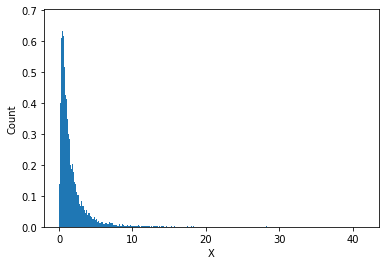

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

""" Plotting data points """
x =df["variable"]

plt.hist(x, density=True, bins=500) # density=False would make counts
#plt.axis([0, 40, 0, 500]) 
plt.ylabel('Count')
plt.xlabel('X');
#normal dist - positive skew

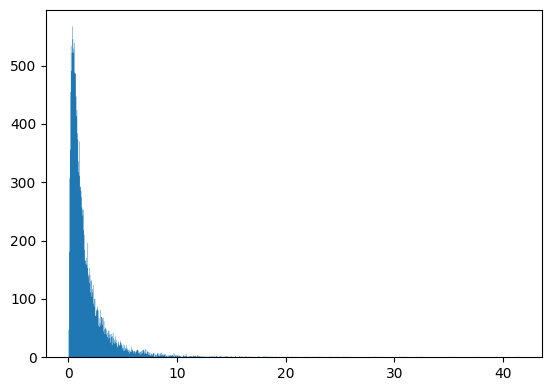

In [7]:
""" Plotting data points: Example shown in class 11/1/2021 """
fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()
ax.hist (df.values
         , bins =1000
         , linewidth =0
         , histtype ='stepfilled')
plt.show()

In [46]:
ldata= np.log(x) #normalizing log data
lavg= np.mean(ldata) #log avg
lstd= np.std(ldata)  #log std

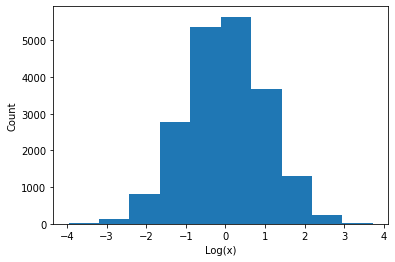

In [9]:
""" Normalized Distribution """
plt.hist(ldata) # density=False would make counts
#plt.axis([0, 40, 0, 500]) 
plt.ylabel('Count')
plt.xlabel('Log(x)');
#normal dist - positive skew
#mean =0, std =0.4
#standard scale
#fitting - to prove 

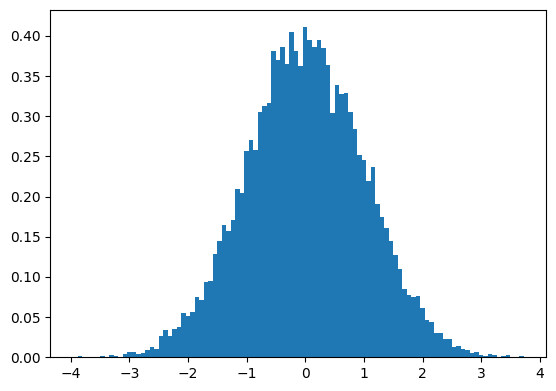

In [36]:
""" Normalized dist: Example shown in class 11/1/2021 """
fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()
ax.hist (ldata
         , bins =100
         , linewidth =0
         , histtype ='stepfilled'
         , density = True)
plt.show()

In [29]:
np.log(np.sqrt(2*np.pi))*len(ldata)

18378.770664093452

In [56]:
def getLogLike(param):
    """ Return the log likehood of the gaussian- dist data 
        given the vector parameters "params"=[avg, log(std)] """
    avg = param[0]
    std = np.exp(param[1])
    ndata = len(ndata)
    
    lprob = - param[1]*ndata \
            - 18378.770664093452 \
            - np.sum((ldata -avg)**2) / (2* std**2)
    return lprob

In [37]:
 getLogLike(param=[-3,1])

-51969.42828542445

In [31]:
 getLogLike(param=[0,0])

-28415.219118590452

In [57]:
def negLogLike(param): return -getLogLike(param)

In [58]:
from scipy.optimize import fmin
bestParams = fmin (func = negLogLike, x0= [-3,1])
print('Returns[{}= {},{}= {}]'.format(chr(956),bestParams[0],chr(963),bestParams[1]))

Optimization terminated successfully.
         Current function value: 28414.741170
         Iterations: 42
         Function evaluations: 80
Returns[μ= 0.006407819368933237,σ= 0.001827686254820341]


In [55]:
"Checking with norm.logpdf"
def gaussian(params):
    mean = params[0]   
    std = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(norm.logpdf(ldata, loc=mean, scale=std))

    return nll
fmin (func = gaussian, x0= [-3,1])

Optimization terminated successfully.
         Current function value: 28414.741166
         Iterations: 42
         Function evaluations: 81


array([0.00640884, 1.00182681])

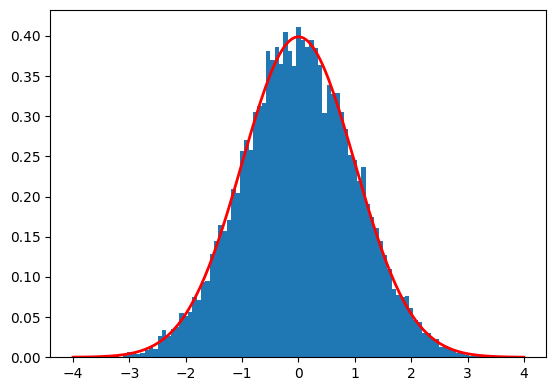

In [38]:
from scipy.stats import norm
testx= np.linspace(-4,4,200)
testy= norm.pdf(testx)

fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()

h = ax.hist (ldata
         , bins =100
         , linewidth =0
         , histtype ='stepfilled'
         , density = True)

h = ax.plot ( testx
            , testy
            , color = 'r'
            , linewidth = 2
            )

Attempt below to find log likelihoods: came back negative 

Maximum loglikelihood = -28414.74114861546 
found for best mean guess=0.006428052181286503


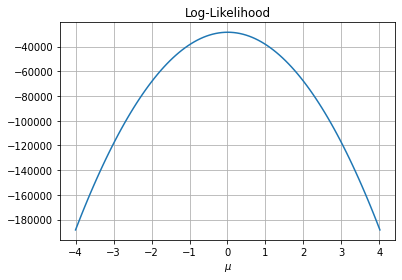

In [76]:
# Array of avg guesses, centered on normal mean, spread out +/- by normal std
low_guess = lavg - 4*lstd
high_guess = lavg + 4*lstd
avg_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
llhs = []
for n in avg_guesses:
    llhs.append(getLogLike([n, np.log(lstd)])) 
# Find the best guess by using logical indexing, then plot the result
best_avg = avg_guesses[llhs.index(max(llhs))]
print('Maximum loglikelihood = {} \nfound for best mean guess={}'.format(max(llhs),best_avg))

plt.plot(avg_guesses, llhs)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()